> # **Name: Nader Elhadedy**

## **Prediction of house prices using linear regression**
## *By utitilizing only Pandas and NumPy libraries*

# **1. Introduction**

This is a classic example for beginners in machine learning. The dataset contains the **house sales for King County, USA, between May 2014 and May 2015**. You can find the full dataset on [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction). Before continuing, it is highly recommended that you click the aforementioned link and get to know the original dataset.


# **2. Initial exploration of the dataset**

In this section, we are going to set our environment up by importing the necessary libraries, as well as loading our data into a Pandas dataframe.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("kc_house_data.csv")

Now, we can go ahead and see how our dataset looks like, while also getting an idea of its statistical properties. 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020.0,0,2008,0,98144,47.5941,-122.299,1020,1357


We can see that each entry has an id, i.e. an identification number, as well as a date, i.e. the date on which the transaction took place. These two columns are irrelevant to our analysis; so we will go ahead and remove them.

In [6]:
df = df.drop(columns=["id", "date"])
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

The attentive reader will already have noticed that there are 21613 observations or entries. Let's confirm it.

In [7]:
df.count(axis=1)

0        19
1        19
2        19
3        19
4        19
         ..
21608    19
21609    19
21610    19
21611    19
21612    19
Length: 21613, dtype: int64

However, we also need to see how many features there are in our dataset.

In [8]:
len(df.columns)

19

Since the number of features is small, it would probably be a good idea to try an alternative implementation, using the normal equation method. Nevertheless, we will go ahead and check the data types and whether they have correctly been interpreted.

In [9]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In addition, it is always a good idea to check for any missing values or "NaN" in the dataset. However, our data is very clean.

In [10]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# **3. Feature selection**

In this section, we are going to use a filter method so as to select which features are going to actually be used by the linear regression algorithm. First of all though, we have to specify which is the target variable we want to predict (price) and which are the features we are going to use (all others).

At this point we are going to check the correlations between our target variable (price) and the features.

In [11]:
df.corrwith(df["price"])

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
dtype: float64

Using a filter method, we are going to select which features are to be used subsequently. Although this is arbitrary and contestable, we will remove all features with an absolute correlation with the target variable which is *smaller than 0.2*.

In [12]:
df_corr = np.array(df.corrwith(df["price"]) < 0.2)

# sqft_lot, zipcode, sqft_lot15, yr_built, yr_renovated, long, condition can be neglected

filter_cols = df.columns[np.invert(df_corr)]

df = df.filter(items=filter_cols)

df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180.0,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170.0,400,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770.0,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050.0,910,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680.0,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530.0,0,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310.0,0,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020.0,0,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600.0,0,47.5345,1410


Furthermore, we also have to ensure that the remaining features are not very highly correlated with each other, i.e. that they are -more or less- independent variables. Let us plot the **Pearson correlation matrix** using Matplotlib and Seaborn.

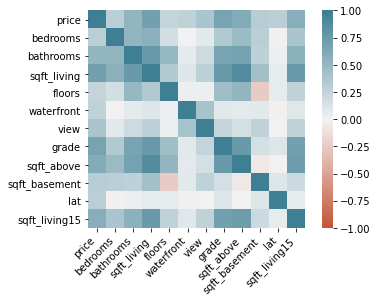

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

From the above figure, we can see that some features are highly correlated with each other. We will -arbitrarily- search for correlations *above 0.75* and remove the features with the **lowest** correlation with the target variable (price).

In [14]:
corr_arr = df.corr() > 0.75
corr_arr.sum(axis=0)

# we can remove lowest sums like lat, view, etc..

price            1
bedrooms         1
bathrooms        2
sqft_living      5
floors           1
waterfront       1
view             1
grade            3
sqft_above       3
sqft_basement    1
lat              1
sqft_living15    2
dtype: int64

Once more, this is contestable and the result of my own interpretation, but I am of the opinion that although there are sets of variables which are indeed highly correlated, they ultimately represent two independent variables and should be kept as they are. I believe this to be the case with the following sets of variables:
- ("bathrooms", "sqft_living") 
- ("grade", "sqft_living")
- ("grade", sqft_above")

In contrast, I deem that the variable "sqft_living" is not only highly correlated with "sqft_above" (0.877) and "sqft_living15" (0.756), but that it really represents most of the information we need for the linear regression. Indeed, according to the description of the original dataset found on [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction), "sqft_above" is the square footage of the house apart from the basement and "sqft_living15" is the square footage of the living room area in 2015 (which implies renovations). It is also useful to note that the variable "grade" is given by the King County grading system and refers to the types of materials used and the quality of workmanship (more info can be found [here](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g))

Thus, I chose to remove two more features ("sqft_above" and "sqft_living15") and keep "sqft_living" which has the highest correlation with the target variable (0.702).

In [15]:
df.corrwith(df["price"])['sqft_living']

0.7020350546118003

In [16]:
df = df.drop(columns=["sqft_above", "sqft_living15"])
len(df.columns)
# 9 independent variables(features) and one for target (dependent)

10

We are ultimately left with **9 features** that will be used for the linear regression. Let us update the features and store their number.

In [17]:
# Update features and store their length
print(df.info())
print("----------------------------------------------")
print(df.count())
print("----------------------------------------------")
print(df.columns)
print("----------------------------------------------")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_basement  21613 non-null  int64  
 9   lat            21613 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 1.6 MB
None
----------------------------------------------
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
floors           21613
waterfront       21613
view             21613
grade            21613
sqft_basement    21613
lat              21613
dtype: int64
------------------

# linear regression**

In this section, we are going to use our implementation of linear regression algorithm.
At the very beggining, we are going to **normalize the features** so as to ensure an efficient convergence of the model.

In [18]:
# Normalize the features
features = df[df.columns.difference(['price'])]
target = df.price

features = (features - features.mean()) / features.std()

In [19]:
features

,bathrooms,bedrooms,floors,grade,lat,sqft_basement,sqft_living,view,waterfront
0,-1.447430,-0.398728,-0.915406,-0.558823,-0.352564,-0.658666,-0.979812,-0.305752,-0.087171
1,0.175603,-0.398728,0.936484,-0.558823,1.161541,0.245136,0.533622,-0.305752,-0.087171
2,-1.447430,-1.473925,-0.915406,-1.409554,1.283507,-0.658666,-1.426221,-0.305752,-0.087171
3,1.149422,0.676469,-0.915406,-0.558823,-0.283281,1.397483,-0.130547,-0.305752,-0.087171
4,-0.149004,-0.398728,-0.915406,0.291909,0.409541,-0.658666,-0.435412,-0.305752,-0.087171
...,...,...,...,...,...,...,...,...,...
21608,0.500209,-0.398728,2.788374,0.291909,1.004935,-0.658666,-0.598732,-0.305752,-0.087171
21609,0.500209,0.676469,0.936484,0.291909,-0.356172,-0.658666,0.250534,-0.305752,-0.087171
21610,-1.772037,-1.473925,0.936484,-0.558823,0.247882,-0.658666,-1.154021,-0.305752,-0.087171
21611,0.500209,-0.398728,0.936484,0.291909,-0.184410,-0.658666,-0.522516,-0.305752,-0.087171


Now we are going to **create the X, y and theta (Θ) matrices**. We could also use for-loops; however, the NumPy library is able to handle numerical computations more efficiently if the operations are vectorized.

In [20]:
# Create X, y and theta

features_mat = np.matrix(features)
target_mat = np.matrix(target).T

features_mat = np.c_[np.ones(len(features_mat)), features_mat]

B = np.matrix(np.zeros(features_mat.shape[1])).T

We are also going to store the target variable and check the size of the matrices.

In [21]:
print(features_mat.shape)
print(target_mat.shape)

(21613, 10)
(21613, 1)


# here we can load our implementation of L.R. from assig3

In [22]:
def cost_function(X, Y, B):
 m = len(Y)
 J = np.sum(np.square(X.dot(B) - Y))/(2 * m)
 return J

def batch_gradient_descent(X, Y, B, alpha, iterations):
 cost_history = [0] * iterations
 m = len(Y)
 
 for iteration in range(iterations):
  # Hypothesis Values
  h = X.dot(B)
  # Difference between Hypothesis and Actual Y
  loss = h - Y
  # Gradient Calculation
  gradient = X.T.dot(loss) / m
  # Changing Values of B using Gradient
  B = B - alpha * gradient
  # New Cost Value
  cost = cost_function(X, Y, B)
  cost_history[iteration] = cost
 
 return B, cost_history

In [23]:
import numpy as np

class LinearRegression:
  def __init__(self):
    self.b = []
    self.cost = []

  def train(self, X, Y, B, alpha, iterations):
    self.b, self.cost = batch_gradient_descent(X, Y, B, alpha, iterations)

  def test(self, X):
    return X.dot(self.b)

In [24]:
# Train

model = LinearRegression()

model.train(features_mat, target_mat, B, 0.01, 10000)

model.b

matrix([[540088.1417665 ],
        [ -2716.73998554],
        [-24077.68125665],
        [-16206.53214715],
        [ 97488.86406382],
        [ 93272.99328377],
        [  -720.13037622],
        [180367.00760593],
        [ 51639.29961776],
        [ 52033.03328534]])

In [25]:
# test
model.test(features_mat)

matrix([[284516.67965768],
        [663642.47872283],
        [299551.86706755],
        ...,
        [305858.05024296],
        [430315.03890618],
        [305656.10777233]])

In [26]:
#get error range
#Expected value
#max error
#min error
#plot hist of errors

Errors: [20.79417696 20.28541839 19.79621829 ...  2.3067491   2.3067491
  2.3067491 ]
MEAN: 2.392490145335326
MAX: 20.794176955963948
MIN: 2.3067490981180354


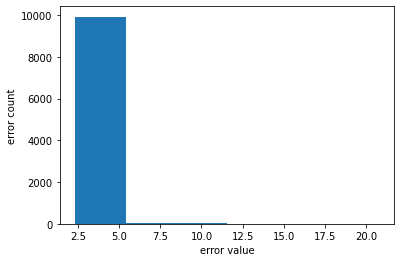

In [27]:
errors = np.asarray(model.cost)
errors = errors/(10**10)
print("Errors:", errors)

print("MEAN:", errors.mean())
print("MAX:", errors.max())
print("MIN:", errors.min())

plt.hist(errors, bins=6)
plt.xlabel("error value")
plt.ylabel("error count")
plt.show()